<a href="https://colab.research.google.com/github/lucasef27/monte-carlo-horse-betting/blob/main/Aposta_de_cavalos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

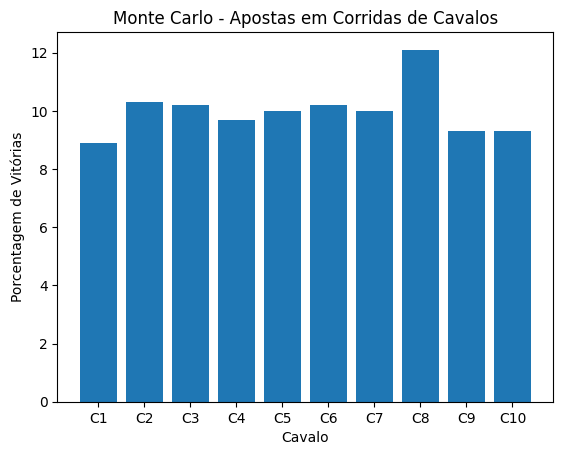

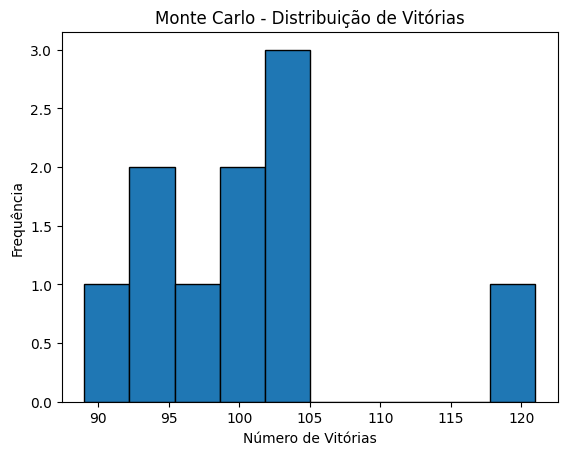

In [ ]:
import random
import matplotlib.pyplot as plt

# Dados dos cavalos (exemplo simplificado)
cavalos = [
    {"nome": "C1", "velocidade": 9.5, "resistencia": 8.2, "forma_fisica": 7.9, "condicao_pista": 8.6},
    {"nome": "C2", "velocidade": 8.7, "resistencia": 7.5, "forma_fisica": 8.3, "condicao_pista": 9.1},
    {"nome": "C3", "velocidade": 7.9, "resistencia": 8.8, "forma_fisica": 8.1, "condicao_pista": 8.2},
    {"nome": "C4", "velocidade": 8.3, "resistencia": 7.1, "forma_fisica": 8.6, "condicao_pista": 7.9},
    {"nome": "C5", "velocidade": 7.5, "resistencia": 9.2, "forma_fisica": 7.8, "condicao_pista": 8.8},
    {"nome": "C6", "velocidade": 8.1, "resistencia": 8.5, "forma_fisica": 7.3, "condicao_pista": 9.3},
    {"nome": "C7", "velocidade": 9.0, "resistencia": 8.1, "forma_fisica": 8.2, "condicao_pista": 8.4},
    {"nome": "C8", "velocidade": 8.4, "resistencia": 7.9, "forma_fisica": 8.7, "condicao_pista": 7.5},
    {"nome": "C9", "velocidade": 7.8, "resistencia": 8.4, "forma_fisica": 7.6, "condicao_pista": 9.0},
    {"nome": "C10", "velocidade": 8.6, "resistencia": 7.7, "forma_fisica": 8.4, "condicao_pista": 8.7}
]

def monte_carlo_aposta(cavalos, num_simulacoes):
    vitorias = {cavalo["nome"]: 0 for cavalo in cavalos}

    for _ in range(num_simulacoes):
        probabilidades = []
        total_score = sum(cavalo["velocidade"] + cavalo["resistencia"] + cavalo["forma_fisica"] + cavalo["condicao_pista"] for cavalo in cavalos)

        for cavalo in cavalos:
            probabilidade = (cavalo["velocidade"] + cavalo["resistencia"] + cavalo["forma_fisica"] + cavalo["condicao_pista"]) / total_score
            probabilidades.append(probabilidade)

        vencedor = random.choices(cavalos, weights=probabilidades)[0]
        vitorias[vencedor["nome"]] += 1

    # Calcular porcentagem de vitórias
    porcentagens = [(num_vitorias / num_simulacoes) * 100 for num_vitorias in vitorias.values()]

    # Plotar gráfico de barras das porcentagens de vitórias
    plt.bar(vitorias.keys(), porcentagens)
    plt.xlabel("Cavalo")
    plt.ylabel("Porcentagem de Vitórias")
    plt.title("Monte Carlo - Apostas em Corridas de Cavalos")
    plt.show()

    # Plotar histograma das vitórias
    plt.hist(list(vitorias.values()), bins=len(vitorias), edgecolor='black')
    plt.xlabel("Número de Vitórias")
    plt.ylabel("Frequência")
    plt.title("Monte Carlo - Distribuição de Vitórias")
    plt.show()

# Executar o método Monte Carlo com 1000 simulações
monte_carlo_aposta(cavalos, 1000)


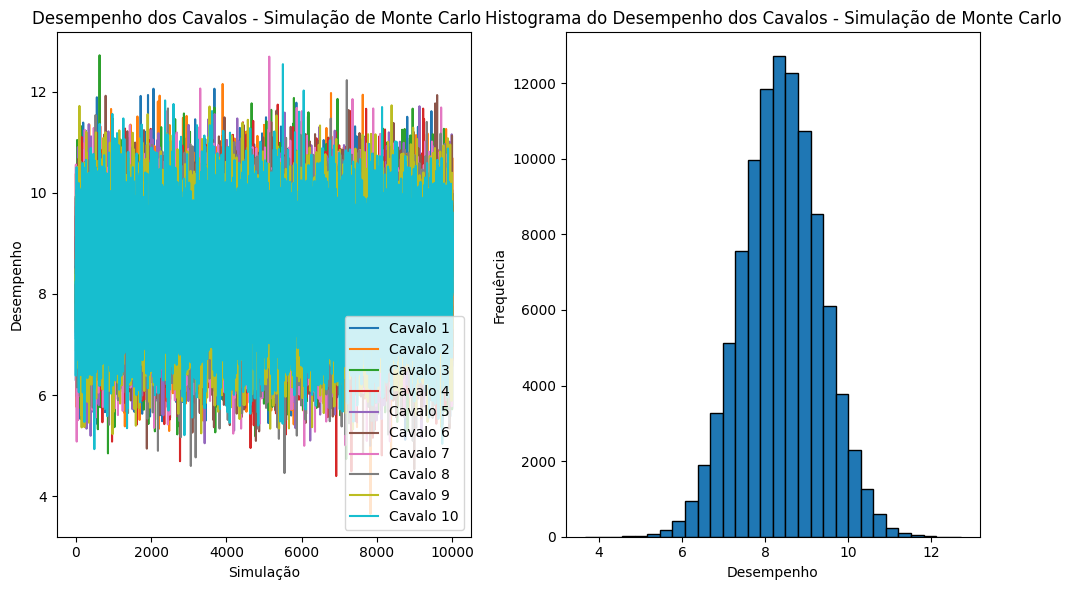

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir número de cavalos e parâmetros
num_cavalos = 10
num_simulacoes = 10000

# Definir médias e desvios padrão para cada variável
media_velocidade = 10
desvio_padrao_velocidade = 2

media_resistencia = 8
desvio_padrao_resistencia = 1.5

media_forma_fisica = 7
desvio_padrao_forma_fisica = 1

media_condicoes_pista = 6
desvio_padrao_condicoes_pista = 1.2

# Gerar simulações de Monte Carlo para cada cavalo
simulacoes = np.zeros((num_cavalos, num_simulacoes))

for cavalo in range(num_cavalos):
    velocidade = np.random.normal(media_velocidade, desvio_padrao_velocidade, num_simulacoes)
    resistencia = np.random.normal(media_resistencia, desvio_padrao_resistencia, num_simulacoes)
    forma_fisica = np.random.normal(media_forma_fisica, desvio_padrao_forma_fisica, num_simulacoes)
    condicoes_pista = np.random.normal(media_condicoes_pista, desvio_padrao_condicoes_pista, num_simulacoes)

    # Calcular desempenho como a média ponderada das variáveis
    desempenho = (0.4 * velocidade) + (0.3 * resistencia) + (0.2 * forma_fisica) + (0.1 * condicoes_pista)

    simulacoes[cavalo] = desempenho

# Plotar gráfico e histograma dos resultados
plt.figure(figsize=(10, 6))

# Plotar gráfico
plt.subplot(1, 2, 1)
for cavalo in range(num_cavalos):
    plt.plot(simulacoes[cavalo], label=f'Cavalo {cavalo + 1}')
plt.xlabel('Simulação')
plt.ylabel('Desempenho')
plt.title('Desempenho dos Cavalos - Simulação de Monte Carlo   ')
plt.legend()

# Plotar histograma
plt.subplot(1, 2, 2)
plt.hist(simulacoes.flatten(), bins=30, edgecolor='black')
plt.xlabel('Desempenho')
plt.ylabel('Frequência')
plt.title('Histograma do Desempenho dos Cavalos - Simulação de Monte Carlo')

plt.tight_layout()
plt.show()


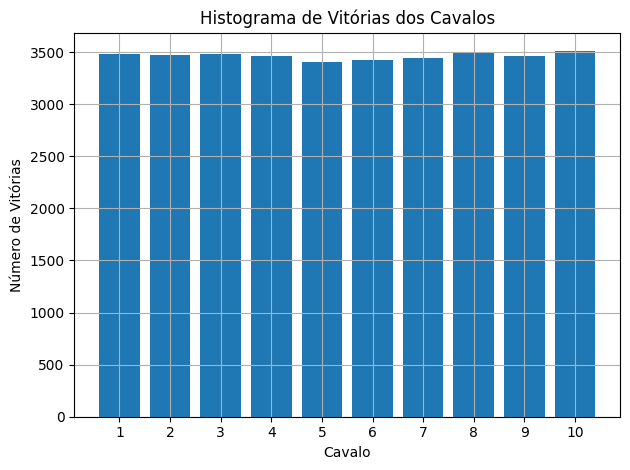

In [ ]:
vitorias = np.sum(simulacoes > np.max(simulacoes, axis=0) * 0.9, axis=1)  # Definir critério de vitória (90% do máximo)

plt.bar(range(num_cavalos), vitorias)
plt.xlabel('Cavalo')
plt.ylabel('Número de Vitórias')
plt.title('Histograma de Vitórias dos Cavalos')
plt.xticks(range(num_cavalos), [f'{i + 1}' for i in range(num_cavalos)])
plt.grid(True)

plt.tight_layout()
plt.show()
